<a href="https://colab.research.google.com/github/mayukh776/Projects/blob/master/COVID_19_OUTBREAK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time Series Forecasting

## Notebook Details
- __notebook name__: `'COVID-19 OUTBREAK'
- __notebook version/date__: `1.0.0`/`17-04-20`
- __notebook server__: Google Colab
- __python version__: `3.6`
- __pytorch version__: `1.1.0`
- __keras version__: 1.1.0

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import folium
from folium import plugins
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Import DataSet Containing the Cumulative Cases For Covid-19 across various states in the country from 21'st March 21 to 2nd September  

In [60]:
df_india = pd.read_csv('datasets_557629_1459761_covid_19_india.csv',parse_dates=True)
df_india.drop(['Sno'],axis=1,inplace=True)
df_latest = df_india[df_india['Date']=="02/09/20"]
print("Total No Of Confirmed Cases In The Country: ",df_latest['Confirmed'].sum())

Total No Of Confirmed Cases In The Country:  3769523


**Displaying the Active Covid-19 cases (Excluding the recovered and the dead) of all the states in descending order **

In [61]:
df_latest['Active Cases'] = df_latest['Confirmed'] - df_latest['Cured'] - df_latest['Deaths']
Tot_Cases = df_latest.groupby('State/UnionTerritory')['Active Cases'].sum().sort_values(ascending=False).to_frame()
Tot_Cases.style.background_gradient(cmap='Reds')

,Active Cases
State/UnionTerritory,
Maharashtra,198866
Andhra Pradesh,101210
Karnataka,91018
Uttar Pradesh,55538
Tamil Nadu,52379
Telengana,32341
Odisha,25288
West Bengal,24822
Assam,24514


In [ ]:
df_india_group = df_latest.groupby('State/UnionTerritory')['Confirmed','Cured','Deaths'].sum().sort_values(by = 'Confirmed',ascending=False)
df_india_group

,Confirmed,Cured,Deaths
State/UnionTerritory,,,
Maharashtra,808306,584537,24903
Andhra Pradesh,445139,339876,4053
Tamil Nadu,433969,374172,7418
Karnataka,351481,254626,5837
Uttar Pradesh,235757,176677,3542
Delhi,177060,156728,4462
West Bengal,165721,137616,3283
Bihar,138349,121560,621
Telengana,130589,97402,846


**Displaying the geographical latitudes and longitudes of each state**

In [ ]:
India_coord = pd.read_excel('Indian Coordinates.xlsx')
India_coord

,State/UnionTerritory,Latitude,Longitude
0,Andaman And Nicobar,11.667026,92.735983
1,Andhra Pradesh,14.750429,78.570026
2,Arunachal Pradesh,27.100399,93.616601
3,Assam,26.749981,94.216667
4,Bihar,25.785414,87.479973
5,Chandigarh,30.719997,76.780006
6,Chhattisgarh,22.090420,82.159987
7,Dadra And Nagar Haveli,20.266578,73.016618
8,Delhi,28.669993,77.230004
9,Goa,15.491997,73.818001


**Creating a zoomable map using Folium package.The magnitude of the cases are represented by the radius of the circles**

In [ ]:
df_full = pd.merge(India_coord,df_india_group,on='State/UnionTerritory')
map = folium.Map(location=[20, 70],zoom_start=4,tiles='Stamen Terrain')
for lat, lon, value, name in zip(df_full['Latitude'], df_full['Longitude'], df_full['Confirmed'], df_full['State/UnionTerritory']):
    val = 100*value/1000000
    folium.CircleMarker([lat, lon], radius= 0.8*val, popup = ('<strong>State</strong>: ' + str(name).capitalize() + '<strong>Total Cases</strong>: ' + str(value) + ''),color='red',fill_color='red',fill_opacity=0.3 ).add_to(map)
map

**Confirmed Vs Recovered Figures**

'ax.legend(ncol=2, loc="lower right", frameon=True)\nax.set(xlim=(0, 35), ylabel="",xlabel="Cases")\nsns.despine(left=True, bottom=True)'

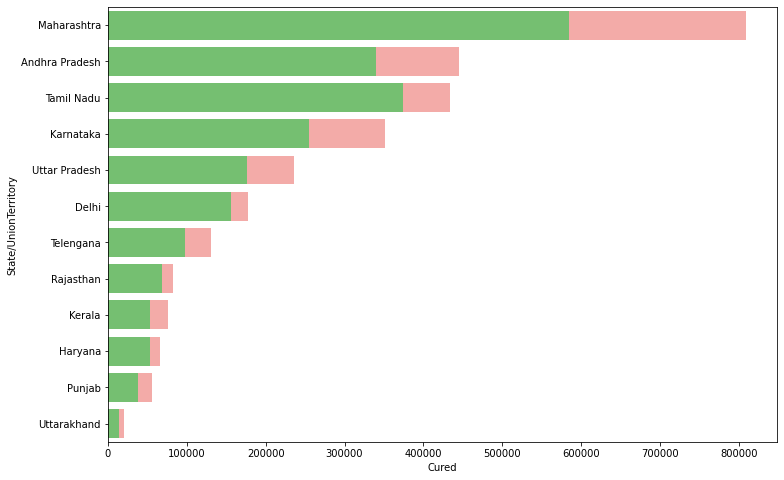

In [ ]:
f, ax = plt.subplots(figsize=(12, 8))
data = df_full[['State/UnionTerritory','Confirmed','Cured','Deaths']]
data.sort_values('Confirmed',ascending=False,inplace=True)
sns.set_color_codes("pastel")
sns.barplot(x="Confirmed", y="State/UnionTerritory", data=data,label="Total", color="r")
sns.set_color_codes("muted")
sns.barplot(x="Cured", y="State/UnionTerritory", data=data, label="Cured", color="g")

**The Rise of the Coronavirus cases (State-Wise)**

In [ ]:
import plotly
plotly.io.renderers.default = 'colab'
# Rise of COVID-19 cases in India
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_india['Date'], y = df_india['Confirmed'], mode='lines+markers',name='Total Cases'))
fig.update_layout(title_text='Trend of Coronavirus Cases in India (Cumulative cases)',plot_bgcolor='rgb(230, 230, 230)')
fig.show()

Taking the aggregated Confirmed cases all across the world from 22/01/20 to 05/09/20

In [ ]:
df_aggregate = pd.read_csv('worldwide-aggregate.csv')
df_aggregate.Date = pd.to_datetime(df_aggregate.Date)
df_aggregate = df_aggregate.set_index('Date')
df_aggregate = df_aggregate['Confirmed']
print(df_aggregate)

Date
2020-01-22         555
2020-01-23         654
2020-01-24         941
2020-01-25        1434
2020-01-26        2118
                ...   
2020-09-01    25749642
2020-09-02    26031410
2020-09-03    26304856
2020-09-04    26609482
2020-09-05    26873146
Name: Confirmed, Length: 228, dtype: int64


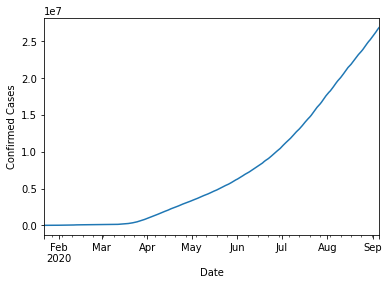

In [ ]:
df_aggregate.plot()
plt.ylabel('Confirmed Cases')
plt.show()

Making an array of the indices of the given data so that we can later convert the array back into dataframe format.
y - the actual values of th dataset except the dates index.
Fitting the dataset with MLP regressor.
The Multi Layer Perception Regressor works sort of similar to a neural network as it takes an input vector, activates the hidden neurons using an activation function (mostly relu) and in return gives us the output by backpropogating the squared loss function and minimizing it based on stochastic gradient descent. 

In [ ]:
data_new = df_aggregate.resample('D').first().fillna(0)
X1 = np.arange(len(data_new)).reshape(-1,1)
y1 = data_new.values
from sklearn.neural_network import MLPRegressor
regressor = MLPRegressor(hidden_layer_sizes=[32,32,10],solver='lbfgs',max_iter=50000,alpha=0.0005,random_state=26)
regressor.fit(X1,y1)

MLPRegressor(activation='relu', alpha=0.0005, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=[32, 32, 10], learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=50000,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=26, shuffle=True, solver='lbfgs',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

Now testing it on the given data and an additional 30 data points. We wish to predict the trends of the upcoming 4 weeks. We will get a straight line which is not very practical as the virus is highly contagious and the cases are supposed to increase exponentially.
Note: The default solver ‘adam’ works pretty well on relatively large datasets (with thousands of training samples or more) in terms of both training time and validation score. For small datasets, however, ‘lbfgs’ can converge faster and perform better.

In [ ]:
from datetime import date,timedelta
X_test = np.arange(len(data_new)+30).reshape(-1,1)
pred = regressor.predict(X_test)
prediction = pred.round().astype(int)
week = [data_new.index[0] + timedelta(i) for i in range(len(prediction))]
dt_idx = pd.DatetimeIndex(week)
predicted_count = pd.Series(prediction,dt_idx)
print(predicted_count)

2020-01-22           7
2020-01-23         490
2020-01-24        1584
2020-01-25        4308
2020-01-26        7500
                ...   
2020-10-01    32865451
2020-10-02    33109445
2020-10-03    33353438
2020-10-04    33597432
2020-10-05    33841425
Length: 258, dtype: int64


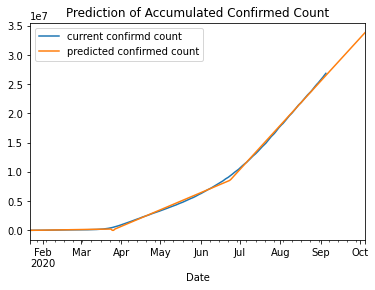

In [ ]:
df_aggregate.plot()
predicted_count.plot()
plt.title('Prediction of Accumulated Confirmed Count')
plt.legend(['current confirmd count', 'predicted confirmed count'])
plt.show()

# PROPHET METHOD
Forecasting is often employed in many organizations such as supply chain management, sales and economics not just in the weather industry.Prophet package was first developed by Facebook's Core Data Science team as an open source tool for forecasting. Automated forecasting can be inflexible as it fails incorporating an analysts domain knowledge.Prophet begins by modeling a time series using the analysts specified parameters, producing forecasts and then evaluating them.
Using Prophet method to forecast the trends in the next 6 months by following certain trends.Non-linear.First fit the model based on pr_data.Make a future dataframe and set period = 180. Call predict to make predictions on the future dataframe and store it in forecast.
yhat- uncertainity interval along with it's lower and upper bounds.
trends - long-term increase or decrease in the data.
weekly - weekly trends.

In [ ]:
prophet = pd.DataFrame(data_new)
pr_data = prophet.reset_index()
pr_data.columns = ["ds","y"]
from fbprophet import Prophet
from fbprophet.plot import plot_plotly, add_changepoints_to_plot
model = Prophet()
model.fit(pr_data)
future = model.make_future_dataframe(periods=180)
forecast = model.predict(future)
print(forecast)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


            ds         trend  ...  multiplicative_terms_upper          yhat
0   2020-01-22 -5.393853e+03  ...                         0.0 -1.361046e+04
1   2020-01-23 -3.647448e+03  ...                         0.0 -2.080173e+03
2   2020-01-24 -1.901042e+03  ...                         0.0  1.256690e+04
3   2020-01-25 -1.546372e+02  ...                         0.0  1.581792e+04
4   2020-01-26  1.591768e+03  ...                         0.0  3.949544e+03
..         ...           ...  ...                         ...           ...
403 2021-02-28  7.197355e+07  ...                         0.0  7.197591e+07
404 2021-03-01  7.223028e+07  ...                         0.0  7.221848e+07
405 2021-03-02  7.248702e+07  ...                         0.0  7.247267e+07
406 2021-03-03  7.274375e+07  ...                         0.0  7.273554e+07
407 2021-03-04  7.300049e+07  ...                         0.0  7.300206e+07

[408 rows x 16 columns]


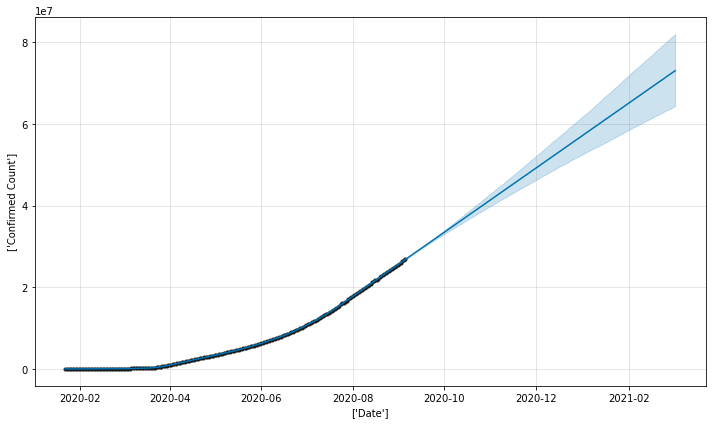

In [ ]:
# Plot the prophet forecast with pyplot offline
import plotly.offline as py
fig = plot_plotly(model,forecast)
py.iplot(fig)
# Plot the prophet forecaast
fig = model.plot(forecast,xlabel=['Date'],ylabel=['Confirmed Count'])

According to the Prophet model, based on the current trends the no of cases is expected to rise to 10.84 million by September 2020. The light blue shaded area marks the uncertainity interval. We can break this down a bit further by calling the plot_components() method to inspect the forecast components.
It looks like the trend may be cyclical as seen in the rise-and-fall pattern. We can observe a sharp peak on Friday. This could probably be due to the fact that people are ignoring social distancing and are engaging in large gatherings despite their government's warnings.

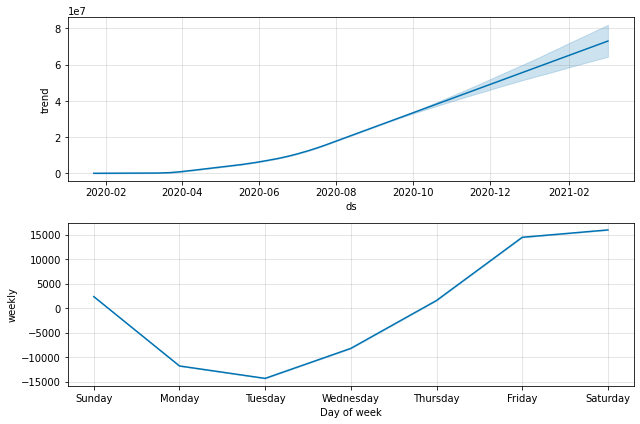

In [ ]:
figure = model.plot_components(forecast)

# **Auto Regressive Integrated Moving Average**
ARIMA, short for ‘AutoRegressive Integrated Moving Average’, is a forecasting algorithm based on the idea that the information in the past values of the time series can alone be used to predict the future values.

In [ ]:
arima_data = prophet.reset_index()
arima_data.columns = ['confirmed_date','Count']
print(arima_data)

    confirmed_date     Count
0       2020-01-22       555
1       2020-01-23       654
2       2020-01-24       941
3       2020-01-25      1434
4       2020-01-26      2118
..             ...       ...
223     2020-09-01  25749642
224     2020-09-02  26031410
225     2020-09-03  26304856
226     2020-09-04  26609482
227     2020-09-05  26873146

[228 rows x 2 columns]


AIC levels pretty high. Select p,d and q as 2,2,1 respectively. Log likelihood is highly negative which is favorible. P-values of aall the coefficients(excluding the const.) are close to zero and significantly lesser than 0.05.

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
c_model = ARIMA(arima_data['Count'].values,order =(2,1,2))
model_fit = c_model.fit(trend='c',full_output = True,disp=True)
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                  227
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -2501.265
Method:                       css-mle   S.D. of innovations          14611.508
Date:                Mon, 07 Sep 2020   AIC                           5014.530
Time:                        05:19:19   BIC                           5035.079
Sample:                             1   HQIC                          5022.822
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.184e+05    1.2e+05      0.985      0.326   -1.17e+05    3.54e+05
ar.L1.D.y      1.3670      0.056     24.247      0.000       1.257       1.478
ar.L2.D.y     -0.3677      0.056     -6.529      0.000      -0.478      -0.257
ma.L1.D.y     -0.4754      0.068     -6.952      0.000      -0.609      -0.341
ma.L2.D.y     -0.2612      0.053     -4.968      0.000      -0.364      -0.158
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0012           +0.0000j            1.0012            0.0000
AR.2            2.7161           +0.0000j            2.7161            0.0000
MA.1            1.2479           +0.0000j            1.2479            0.0000
MA.2           -3.0676           +0.0000j            3.0676            0.5000
-----------------------------------------------------------------------------
"""

As you can see the forecasted values are in line with the actual ones so much so that one is superimposed on top of another.
***Residual Errors*** - The difference between what was expected and what was predicted is called the residual error. In autooregression , some number of lagged error values are used to predict the error at the next time step.
When you set dynamic=False the in-sample lagged values are used for prediction.
That is, the model gets trained up until the previous value to make the next prediction.  
From the residual plots we observe that higher the peaks , more the chances of error.

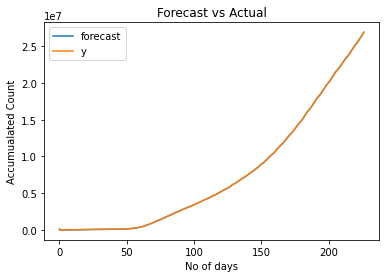

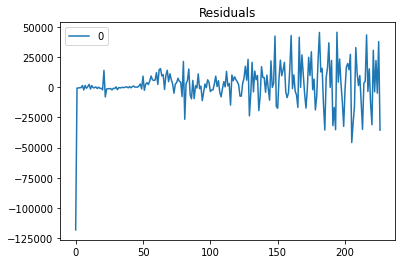

In [ ]:
model_fit.plot_predict(dynamic=False)
plt.title('Forecast vs Actual')
plt.xlabel('No of days')
plt.ylabel('Accumualated Count')
pd.DataFrame(model_fit.resid).plot(title='Residuals')

So in hindsight the purpose of this method was to explore the residual errors at each time step. And compare our predicted values with our expected values. Now use this model to forecast the rise in the no of cases for the next 2 months.

In [59]:
improved_forecast = model_fit.forecast(steps=60)
pred_y = improved_forecast[0].tolist()
pd.DataFrame(pred_y,columns=['Predicted Cases For the next 60 days'])

,Predicted Cases For the next 60 days
0,2.712868e+07
1,2.739041e+07
2,2.765432e+07
3,2.791892e+07
4,2.818367e+07
5,2.844836e+07
6,2.871293e+07
7,2.897735e+07
8,2.924159e+07
9,2.950568e+07
